In [46]:
# fontes: 
# https://manipulandodados.com.br/teste-chi-quadrado-pearson-tabelas-de-contingencia/
# https://github.com/mepa/titanic-hypothesis-testing
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
# https://en.wikipedia.org/wiki/Chi-squared_distribution
# https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/what-is-a-hypothesis-test/
# https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/
# https://manipulandodados.com.br/teste-chi-quadrado-pearson-tabelas-de-contingencia/
# https://github.com/yug95/MachineLearning

# HACKEANDO dataset do Titanic
## Vamos aprender sobre Teste de Hipóteses

![logos](https://timeline.canaltech.com.br/39694.700/hackeando-os-hackers-como-um-especialista-enganou-criminosos-virtuais-78395.jpg)

## 0. Preliminares

### 0.1 Carregando módulos Python

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import probplot,chi2_contingency
from scipy import stats
from statsmodels.stats import weightstats as stests

sns.set_style('white') #let's make everything look pretty
%matplotlib inline

In [4]:
# Vamos listar as versões do temos instalado ....
import sys
import matplotlib as mpl
import scipy
print("python " + sys.version)
print("")
print("pandas " + str(pd.__version__))
print("numpy " + np.__version__)
print("matplotlib " + mpl.__version__)
print("seaborn " + sns.__version__)
print("scipy "+scipy.__version__)

python 3.7.2 (default, Dec 29 2018, 06:19:36) 
[GCC 7.3.0]

pandas 0.23.4
numpy 1.15.1
matplotlib 2.2.3
seaborn 0.9.0
scipy 1.1.0


__Carregando e combinando os dados de 'Treino' e 'Teste'__

In [5]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
full=pd.concat([test,train]) #combine the sets vertically--align columns
full.describe()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


![logos](https://cdn.wallpapersafari.com/6/39/vLOJMH.jpg)

### Análise previa

Porém antes de iniciarmos 'mesmo', vamos tentar encontrar padrões de sobreviventes nos dados brutos, segue alguns exemplos de analises que podem ser feitas

**Sobreviventes por sexo**

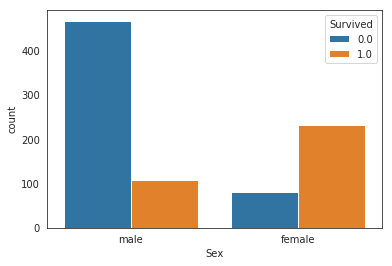

In [8]:
sns.countplot(data=full,x='Sex',hue='Survived')

**Sobrevivente por classe**

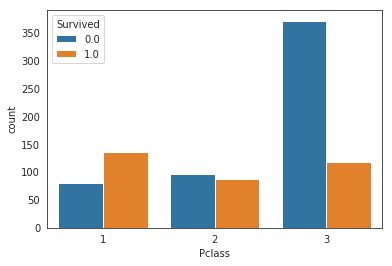

In [9]:
sns.countplot(data=full,x='Pclass',hue='Survived')

**Também pode ser feito o groupby para encontrar os valores**

In [10]:
grupo = full.groupby(by='Survived').mean()
grupo

,Age,Fare,Parch,PassengerId,Pclass,SibSp
Survived,,,,,,
0.0,30.626179,22.117887,0.329690,447.016393,2.531876,0.553734
1.0,28.343690,48.395408,0.464912,444.368421,1.950292,0.473684


## 1. Definição de Hipóteses

__Hipótese Nula__: $H_O$ a hipótese nula é uma afirmação geral ou posição padrão de que não há relação entre dois fenômenos medidos, ou nenhuma associação entre grupos. <p>
     É a hipótese assumida como ___verdadeira para a construção do teste___. É a teoria, o efeito ou a alternativa que se está interessado em testar.

__Hipóteses Alternativa__: $H_A$ é considerada quando a hipótese nula não tem evidência estatística ($H_O$)

![logos](https://cdn-images-1.medium.com/max/800/1*fEPOHXPQO_ZNJC4UQDXmqw.png)

## 2. Suposições e Condições

a. Independência:
- _Dentro dos Grupos: As observações amostradas devem ser independentes dentro de cada grupo._ 
    - Amostra aleatória / atribuição
    - Se amostragem sem reposição, n <10% da população total  
- _Entre Grupos: Dois grupos devem ser independentes um do outro (não pareados)_

b. *Tamanho da amostra / inclinação: cada amostra deve atender à condição de falha de sucesso::*
    $$n_{\rm child} p_{\rm child} \ge 10 \quad \textrm{and} \quad n_{\rm child} (1 - p_{\rm child}) \ge 10$$
    $$n_{\rm adult} p_{\rm adult} \ge 10 \quad \textrm{and} \quad n_{\rm adult} (1 - p_{\rm adult}) \ge 10$$
    

### Checar Independência
1.Vemos a partir do acima descrito que só temos idades para 1046 dos 1309 passageiros no total. Podemos dimensionar esses números para todo o conjunto de dados.

In [11]:
# Vamos selecionar 4 colunas do dataframe
# Cópia profunda significa fazer uma cópia real na memória em vez de uma fatia
full_trim = full[['Survived', 'Age', 'Sex', 'Pclass']].copy(deep=True) 

2.Visualizamos que as idades estão certas, embora haja uma queda notável no número de adolescentes e nos jovens adultos..

/home/lucas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


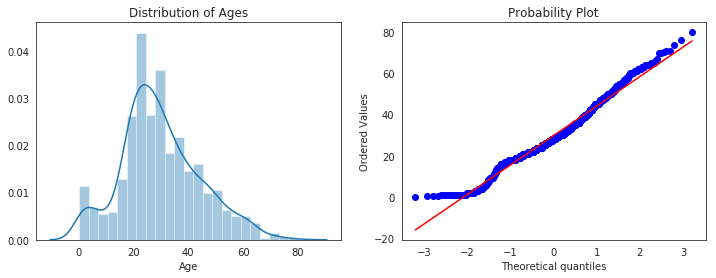

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(12,4)

age_plotting=full_trim.loc[full_trim['Age'].notnull(),'Age'] #sns doesn't handle nan's
sns.distplot(age_plotting,ax=ax1)
ax1.set_title("Distribution of Ages")

x=probplot(age_plotting,plot=ax2)

3.Vamos examinar a fundo a idade entre criança e adulto. Podemos escalá-los para determinar o tamanho de nossas amostras.. 

In [13]:
def agegroup(x):
    '''
    Eu determino a faixa etária apropriada para um determinado passageiro
    '''
    if np.isnan(x):
        return (np.nan)
    elif x<18:
        return("Child")
    else:
        return("Adult")

full_trim['AgeGroup']=full_trim['Age'].apply(agegroup)
full_trim['AgeGroup'].value_counts()

Adult    892
Child    154
Name: AgeGroup, dtype: int64

In [14]:
full_trim['AgeGroup'].value_counts()*(1317.0/1046.0)
#escala por fator de contagem total de dados sobre linhas de dados com idades

Adult    1123.101338
Child     193.898662
Name: AgeGroup, dtype: float64

4.Estimar o número de crianças em 194 e adultos em 1123. Assim, o tamanho da amostra deve ser menor que 19 para crianças e menor que 112 para adultos, para **atender ao critério de 10% para independência**.

5.Utilize um subconjunto de linhas de conjuntos de treinamento com idades (para as quais temos dados de sobrevivência). Um tamanho de amostra de 100 corresponde à nossa condição de 10% para independência.

In [15]:
sample=train.ix[train['Age'].notnull()].sample(100,random_state=100)
sample['AgeGroup']=sample['Age'].apply(agegroup)
sample['AgeGroup'].value_counts()

/home/lucas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Adult    84
Child    16
Name: AgeGroup, dtype: int64

![logos](https://wallup.net/wp-content/uploads/2017/03/29/95920-Titanic-748x468.jpg)

## Tabela de contingência
Em estatística , uma tabela de contingência (também conhecida como tabulação cruzada ou tabela de referência cruzada ) é um tipo de tabela em um formato de matriz que exibe a distribuição de frequência (multivariada) das variáveis. Eles são muito utilizados em pesquisa de opinião, inteligência de negócios, engenharia e pesquisa científica. Eles fornecem uma **imagem básica da inter-relação entre duas variáveis** e podem ajudar a encontrar interações entre elas.<p>

6.Criando tabelas de contingência.

In [16]:
# Criar uma nova coluna que transforma as colunas sobrevividas em rótulos
survival_dict={1:'Yes',0:'No'}
sample['Lived']=sample['Survived'].map(survival_dict)

In [17]:
sample['Lived'].value_counts()

No     69
Yes    31
Name: Lived, dtype: int64

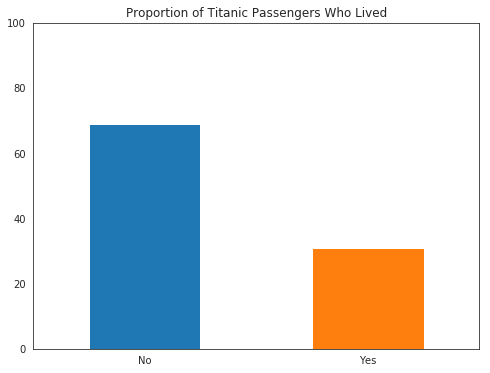

In [18]:
# Vamos explorar melhor esses Dados, como? Gráficos
sample['Lived'].value_counts().plot(kind="bar",
                                        ylim=(0,100),
                                        rot=0,
                                        title="Proportion of Titanic Passengers Who Lived",
                                        figsize=(8,6))

## Tabela de Frequência
Quando se está a analisar um conjunto de dados, começa-se por considerar as diferentes categorias ou classes, e para cada uma delas calcula-se a sua **frequência absoluta obtendo-se a distribuição de frequências do conjunto de dados**. Esta distribuição de frequências é representada na forma de uma tabela, a que se dá o nome de tabela de frequências. Uma vez que existe alguma especificidade na fase da definição das classes, conforme o tipo dos dados a analisar, far-se-á essa distinção a seguir, nas indicações para a construção da tabela de frequências.

### Verificando o tamanho / inclinação da amostra.

1.Criando tabelas de frequência.

In [19]:
lived=pd.crosstab(index=sample['AgeGroup'],
            columns=sample['Lived'])
lived

Lived,No,Yes
AgeGroup,,
Adult,62,22
Child,7,9


In [20]:
lived_proportions=pd.crosstab(index=sample['AgeGroup'],
            columns=sample['Lived'],
            margins=True)
lived_proportions

Lived,No,Yes,All
AgeGroup,,,
Adult,62,22,84
Child,7,9,16
All,69,31,100


## 4. Tome uma decisão e interprete-a no contexto da questão de pesquisa

Teste **Chi-squared** <p> 
O teste é aplicado quando você tem duas variáveis ​​categóricas de uma única população. <p>
    É usado para determinar se existe uma associação significativa entre as duas variáveis.

Por exemplo, em uma **pesquisa eleitoral**, os eleitores podem ser classificados por gênero (masculino ou feminino) e por preferência de voto (democrata, republicano ou independente). Poderíamos usar um teste do qui-quadrado para independência para determinar se o gênero está relacionado à preferência de voto

Usos do **Chi-Square**<p>
A distribuição de qui-quadrado tem muitos uso nas estatística, incluindo:

- Estimativa do intervalo de confiança para um desvio padrão da população de uma distribuição normal de um desvio padrão da amostra.
- Independência de **dois critérios de classificação** de variáveis qualitativas .
- Relacionamentos entre **variáveis categóricas** ( tabelas de contingência ).
- Estudo de variância da amostra quando a distribuição subjacente é normal.
- Testes de desvios de diferenças entre frequências esperadas e observadas (tabelas unidirecionais).
- O teste do qui-quadrado (um teste de qualidade do ajuste ).

1.Calculando chi-squared

In [29]:
from scipy.stats import chisquare
ch,p=chisquare(lived)
p
print('Significance level: ',alpha)
print('Critical value:',p)

Significance level:  0.05
Critical value: [3.56241675e-11 1.95502691e-02]
